In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np; np.set_printoptions(precision=2); np.random.seed(0)
import torch; torch.set_printoptions(precision=2)
seed = 1

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=12); plt.rc('font', family='Arial'); plt.rcParams.update({'font.size': 12})
import matplotlib 
from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as pl

import seaborn as sns
import time
import sys
import itertools
import random; random.seed(0)
# import datetime
# import pickle
# import copy
# import pandas as pd
import scipy
import os
from textwrap import wrap


# from sklearn.cluster import KMeans
# from sklearn.manifold import MDS
# from sklearn.decomposition import PCA
# from sklearn.metrics.pairwise import cosine_similarity

sys.path.append("../two_module_rnn/code")
os.chdir('/home/yl4317/Documents/two_module_rnn/code')
from model import *
from task import *
from functions import *
from train import *

os.chdir('/home/yl4317/Documents/two_module_rnn/')

print(torch.__version__)
print(sys.version)
                
%matplotlib inline

torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True) 
torch.backends.cudnn.deterministic = True 

1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]
1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]


In [ ]:
model_list = []
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if '2022-02-20-12-43-18' in model_name:
        print(model_name)
        model_list.append(model_name)
print(len(model_list))


success_2022-02-18-16-20-49_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam



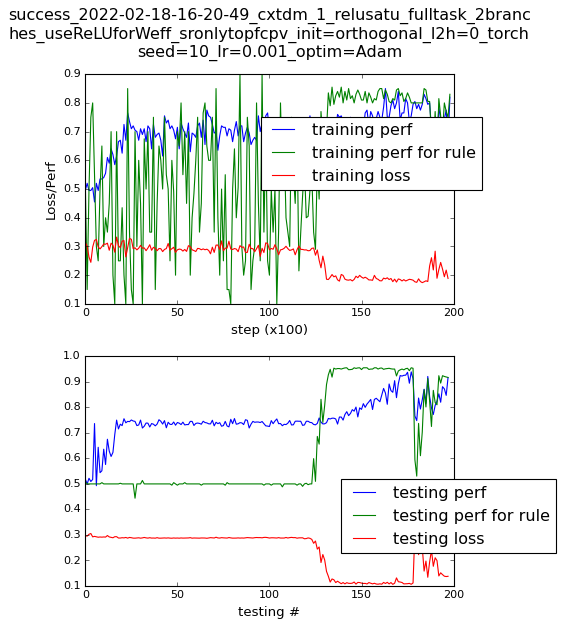

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-18-16-20-49_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_

NameError: name 'neural_data_all_models' is not defined

In [4]:
# whether SR E soma are selective for both rule and response
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if 'success_2022-02-18-16-20-49' in model_name:
        print('\n'+model_name+'\n')
        
        # load model
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file,model_name=model_name, simple=False, plot=True, toprint=False)
        
#         if hp_test['structured_sr_sst_to_sr_edend']==False:
#             continue
        print(hp_test)
    
        # make noiseless
#         model.rnn.network_noise = 0
        hp_test['network_noise'] = 0
        hp_test['input_noise_perceptual'] = 0
        hp_test['input_noise_rule'] = 0
        
        # generate some neural data
        neural_data = generate_neural_data_test(model=model, n_trials_test=100, switch_every_test=10, to_plot=False, hp_test=hp_test, hp_task_test=hp_task_test)
        neural_data_all_models[model_name] = neural_data
        test_data = neural_data['test_data']
        rnn_activity = neural_data['rnn_activity']
        current_matrix = neural_data['current_matrix']
        # generate trial labels
        trial_labels = label_trials(test_data=test_data)
        trial_labels_all_models[model_name] = trial_labels
        rule1_trs_stable = trial_labels['rule1_trs_stable']
        rule2_trs_stable = trial_labels['rule2_trs_stable']
        
        # compute cell selectivity
        all_sels = compute_sel_cxtdm(rnn_activity=rnn_activity, hp=hp_test, hp_task=hp_task_test, 
                                         rule1_trs_stable=trial_labels['rule1_trs_stable'], rule2_trs_stable=trial_labels['rule2_trs_stable'],
                                         left_trs_stable=trial_labels['left_trs_stable'], right_trs_stable=trial_labels['right_trs_stable'], 
                                         stims=test_data['stims'], error_trials=trial_labels['error_trials'])
        resp_sel_normalized = all_sels['resp_normalized']
        rule_sel_normalized = all_sels['rule_normalized_activity']
        
        #=== analysis ===#
        fig, ax=plt.subplots(figsize=[6,5])
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        resp_sel_sresoma = [resp_sel_normalized[n] for n in model.rnn.cg_idx['sr_esoma']]
        rule_sel_sresoma = [rule_sel_normalized[n] for n in model.rnn.cg_idx['sr_esoma']]
        ax.scatter(x=rule_sel_sresoma, y=resp_sel_sresoma)
        ax.set_xlabel('rule selectivity')
        ax.set_ylabel('response selectivity')
        plt.show()

    


success_2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam



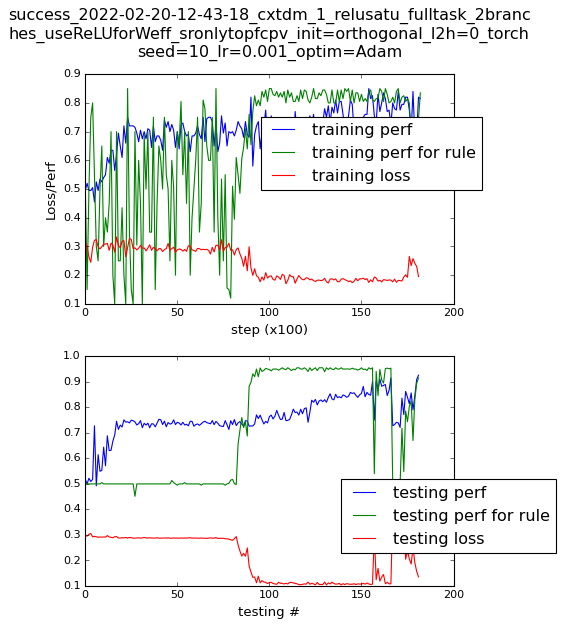

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_

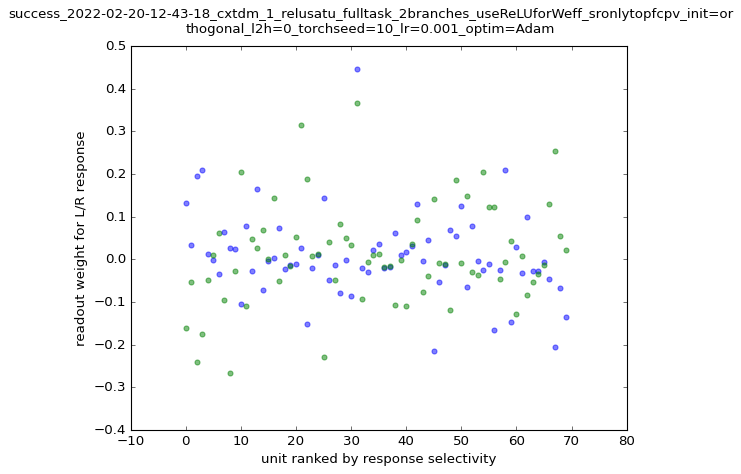

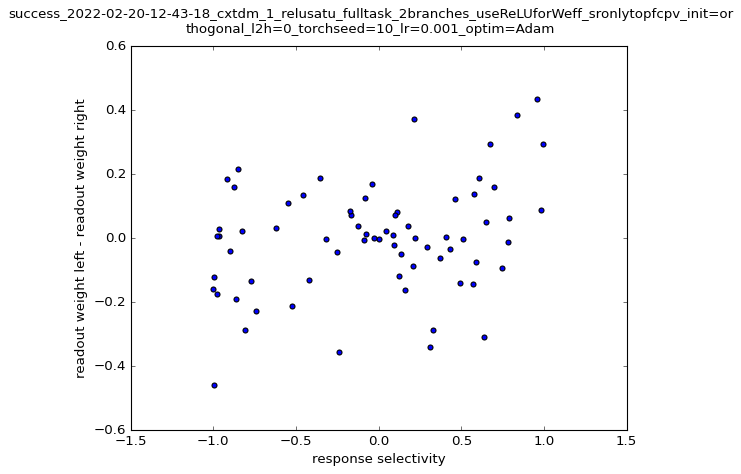


success_2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



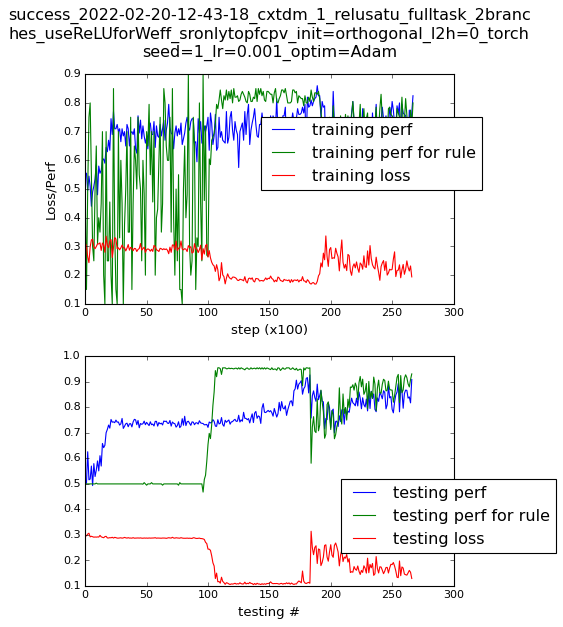

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_b

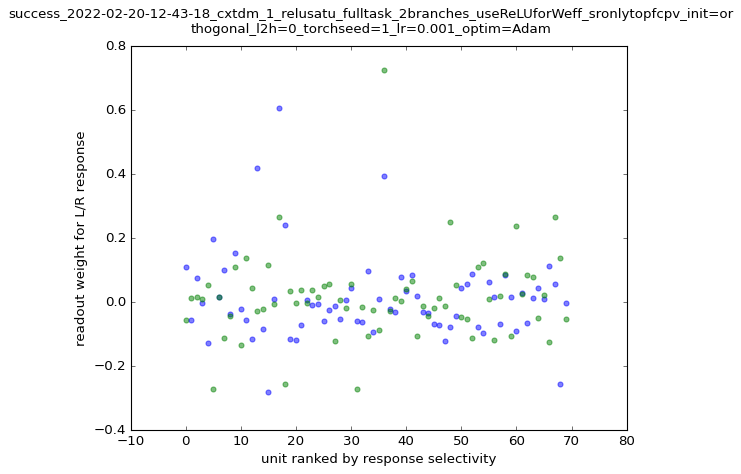

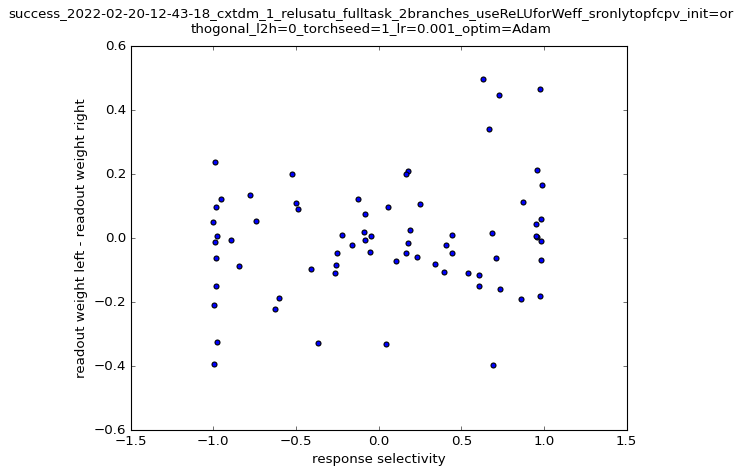


success_2022-02-20-12-43-18_cxtdm_2_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



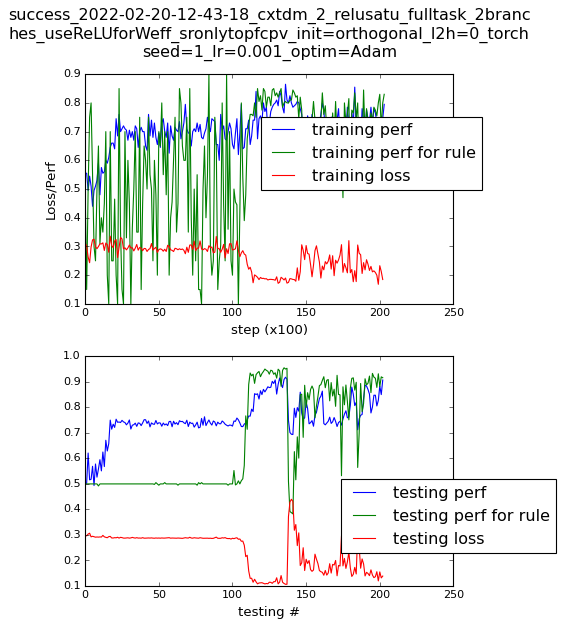

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu_satu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-20-12-43-18_cxtdm_2_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_

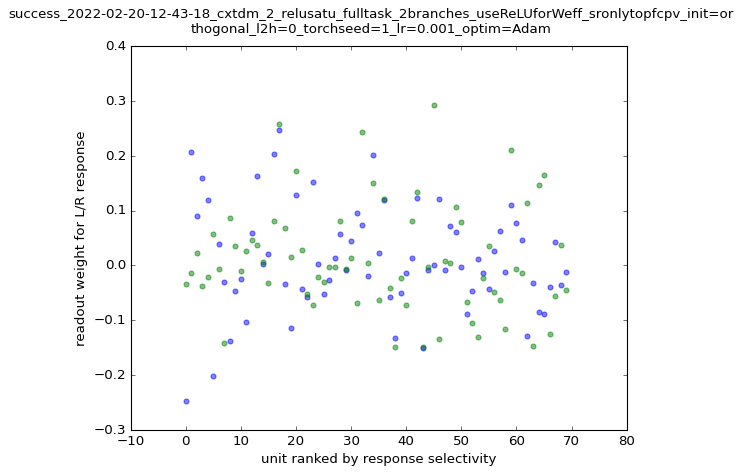

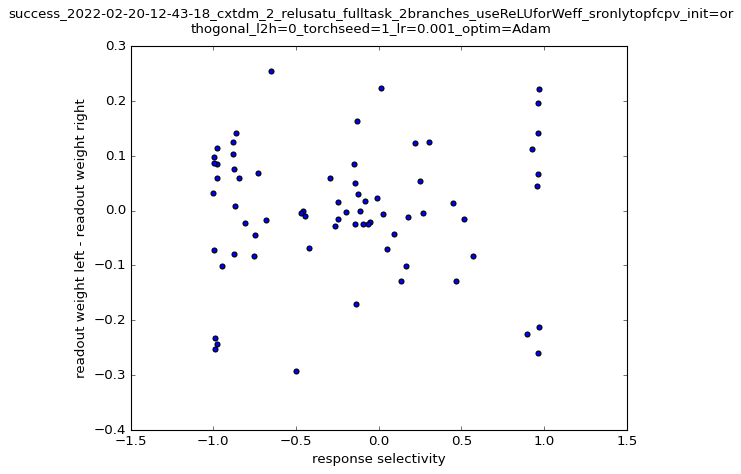

In [41]:
# plot w_out vs resp selectivity
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if 'success_2022-02-20-12-43-18_' in model_name:
        print('\n'+model_name+'\n')
        
        # load model
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file,model_name=model_name, simple=False, plot=True, toprint=False)
        
#         if hp_test['structured_sr_sst_to_sr_edend']==False:
#             continue
        print(hp_test)
    
        # make noiseless
#         model.rnn.network_noise = 0
        hp_test['network_noise'] = 0
        hp_test['input_noise_perceptual'] = 0
        hp_test['input_noise_rule'] = 0
        
        # generate some neural data
        neural_data = generate_neural_data_test(model=model, n_trials_test=100, switch_every_test=10, to_plot=False, hp_test=hp_test, hp_task_test=hp_task_test)
        test_data = neural_data['test_data']
        rnn_activity = neural_data['rnn_activity']
        current_matrix = neural_data['current_matrix']
        # generate trial labels
        trial_labels = label_trials(test_data=test_data)
        
        # compute cell selectivity
        all_sels = compute_sel_cxtdm(rnn_activity=rnn_activity, hp=hp_test, hp_task=hp_task_test, 
                                         rule1_trs_stable=trial_labels['rule1_trs_stable'], rule2_trs_stable=trial_labels['rule2_trs_stable'],
                                         left_trs_stable=trial_labels['left_trs_stable'], right_trs_stable=trial_labels['right_trs_stable'], 
                                         stims=test_data['stims'], error_trials=trial_labels['error_trials'])
        resp_sel_normalized = all_sels['resp_normalized']
        
        #=== analysis ===#
        sr_esoma_sorted_resp_dict = {k: v for k, v in 
                                    sorted(resp_sel_normalized.items(), key=lambda item: item[1], reverse=True)
                                    if k in model.rnn.cg_idx['sr_esoma']}
        sr_esoma_sorted_resp = list(sr_esoma_sorted_resp_dict.keys())    # sort SR Esoma based on resp selectivity
        w_out_eff = (model.rnn.w_out*model.mask_out).detach().cpu().numpy()
        w_out_left = w_out_eff[:,0]
        w_out_right = w_out_eff[:,1]
        
        # plot
        fig, ax=plt.subplots()
        fig.patch.set_facecolor('white')
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        x = 0
        for n in sr_esoma_sorted_resp:
            ax.scatter(x=x, y=w_out_left[n], color='blue', alpha=0.5)
            ax.scatter(x=x, y=w_out_right[n], color='green', alpha=0.5)
            x+=1
        ax.set_xlabel('unit ranked by response selectivity')
        ax.set_ylabel('readout weight for L/R response')
        plt.show()
        
        fig, ax=plt.subplots()
        fig.patch.set_facecolor('white')
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        ax.scatter(x=list(sr_esoma_sorted_resp_dict.values()), 
                   y=w_out_left[sr_esoma_sorted_resp]-w_out_right[sr_esoma_sorted_resp])
        ax.set_xlabel('response selectivity')
        ax.set_ylabel('readout weight left - readout weight right')
        plt.show()

In [38]:
sr_esoma_sorted_resp_dict.values()

dict_values([0.9999664, 0.9999442, 0.99990284, 0.9999004, 0.9986, 0.9969088, 0.9909072, 0.98014176, 0.97610235, 0.97354394, 0.97292984, 0.9633286, 0.9593331, 0.95160806, 0.9506409, 0.9454226, 0.9322265, 0.90394914, 0.8952398, 0.8330033, 0.78005546, 0.7702112, 0.745753, 0.63974833, 0.6202671, 0.5579244, 0.5356114, 0.5168914, 0.49866566, 0.45228526, 0.3998944, 0.36081427, 0.3601111, 0.34079796, 0.26573026, 0.18222883, 0.17030314, 0.08837588, 0.06360284, 0.05886339, 0.05691946, 0.04575901, 0.021331139, 0.009944215, -0.08040012, -0.08059319, -0.11050355, -0.12659393, -0.13770573, -0.1403317, -0.1561219, -0.18398872, -0.2226182, -0.23357351, -0.23585585, -0.25450063, -0.30659246, -0.36105108, -0.45566192, -0.537783, -0.5781518, -0.678794, -0.6841733, -0.69271183, -0.72657275, -0.8563597, -0.9432516, -0.9450814, -0.96542335, -0.99403745])

In [37]:
w_out_left[sr_esoma_sorted_resp]-w_out_right[sr_esoma_sorted_resp]

array([-0.0428,  0.1238, -0.0168,  0.241 ,  0.028 ,  0.025 ,  0.0874,
        0.0148, -0.1034,  0.0021, -0.119 ,  0.161 , -0.026 , -0.1732,
       -0.0239, -0.0186, -0.108 ,  0.2325,  0.1557,  0.0097, -0.0471,
        0.1025, -0.0223, -0.0921,  0.0327, -0.0246,  0.0656,  0.5977,
        0.1053, -0.0753,  0.0944,  0.0616,  0.0636, -0.045 ,  0.0888,
       -0.0099,  0.0108, -0.0214, -0.0534, -0.0096, -0.0273, -0.136 ,
        0.1216, -0.0418, -0.096 ,  0.0311, -0.054 ,  0.0094, -0.0279,
       -0.0388, -0.0916, -0.0147,  0.0741, -0.0064,  0.0516,  0.0608,
        0.0233, -0.0402,  0.04  ,  0.0239, -0.2933, -0.2546,  0.0358,
        0.1051, -0.2228,  0.0241, -0.0824, -0.2059,  0.0451,  0.1522],
      dtype=float32)

In [32]:
sr_esoma_sorted_resp

[14,
 68,
 63,
 3,
 49,
 12,
 0,
 7,
 61,
 22,
 42,
 27,
 17,
 19,
 31,
 51,
 30,
 39,
 13,
 48,
 62,
 5,
 20,
 45,
 4,
 1,
 21,
 2,
 16,
 67,
 54,
 46,
 26,
 55,
 18,
 38,
 65,
 47,
 34,
 23,
 52,
 28,
 43,
 56,
 10,
 29,
 64,
 60,
 37,
 25,
 58,
 9,
 32,
 8,
 35,
 50,
 15,
 53,
 41,
 66,
 59,
 40,
 24,
 36,
 44,
 11,
 6,
 33,
 57,
 69]

In [30]:
w_out_left[sr_esoma_sorted_resp]

array([-5.8240e-02, -1.2612e-02,  1.2220e-01,  1.5547e-01,  7.8261e-04,
       -1.5951e-02,  1.9660e-02, -7.9201e-02, -4.4039e-02,  4.8631e-02,
       -2.2639e-02, -9.6257e-02, -5.8688e-02,  3.1509e-02,  3.3787e-02,
        8.9681e-02,  1.5869e-01, -8.3337e-02,  6.3135e-02,  3.1743e-02,
        3.2207e-01,  5.6076e-02,  1.2027e-02, -7.2277e-02,  4.7971e-02,
        4.9963e-02, -1.5874e-02,  1.9463e-02, -1.3510e-01,  1.9130e-01,
       -4.5177e-04, -1.0036e-01, -6.5949e-02, -1.6352e-03, -7.7917e-02,
       -1.6856e-03,  4.0029e-02, -1.3578e-02, -1.4980e-03,  1.4837e-03,
        8.7705e-02,  4.5671e-01, -9.2791e-02, -7.8949e-02, -6.2227e-02,
       -3.2869e-02, -3.3233e-03, -9.4370e-02,  4.9638e-02,  2.2354e-02,
       -7.6328e-02,  8.7060e-02,  3.5292e-02,  1.3153e-02, -2.1842e-02,
       -2.5329e-02,  1.1338e-01,  1.6435e-02, -1.7423e-02,  5.8391e-02,
       -1.7576e-02, -1.6293e-02, -4.8068e-02, -4.0456e-02, -6.3088e-02,
       -3.2611e-02, -2.8782e-02, -8.3993e-02,  2.0440e-02, -5.59

In [35]:
w_out_left[63]

0.12219739